<h3 style='color:purple' align='center'>Random Forest Python Tutorial</h3>

**Digits dataset from sklearn**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [34]:
df = pd.read_excel('mun.xlsx')
df = df.drop(['date', 'longitude', 'latitude', 'sunset', 'sunrise'], axis=1)

df2 = pd.read_excel('Fix.xlsx')
df2 = df2.drop([0])


**Train and the model and prediction**

In [35]:
X = df.iloc[:, lambda df: [0, 2, 5, 6, 7, 9, 11]]
y = df2.iloc[:, -4].values


In [36]:
X.values.reshape(-1, 1)
X.iloc[2]

uvb              110490.141480
stl1                303.714852
d2m                  25.099450
minTemp              28.691309
meanTemp             30.252224
RH                    0.740049
durationOfDay        12.850556
Name: 2, dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [38]:
model = RandomForestRegressor(n_estimators=100)
model.fit( X_train.astype(float),y_train)

RandomForestRegressor()

In [39]:
y_pre = model.predict(X_test)

In [40]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pre))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pre))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pre)))


Mean Absolute Error (MAE): 17.916739130434788
Mean Squared Error (MSE): 729.5382760869564
Root Mean Squared Error (RMSE): 27.009966236316483


In [41]:
model.score(X_test,y_test)

0.5656694107723457

In [42]:
r2_score(y_test, y_pre)

0.5656694107723457

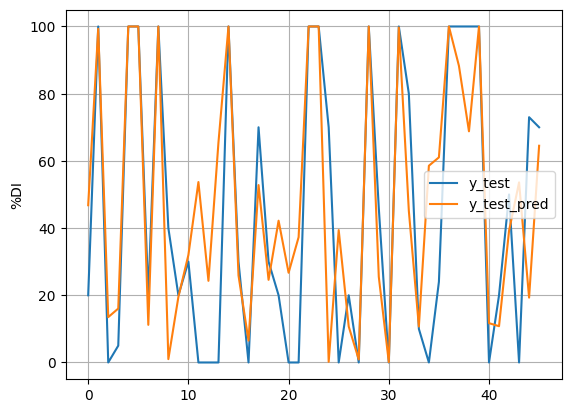

In [43]:
plt.plot(np.arange(len(y_pre)) ,y_test)
plt.plot(np.arange(len(y_pre)) , y_pre)
plt.legend(['y_test','y_test_pred'])
plt.ylabel("%DI")
plt.yticks(np.arange(0,101,20))
plt.grid()


plt.show()

In [44]:
import pickle

# save
with open('model2.pkl','wb') as f:
    pickle.dump(model,f)


In [45]:
# load
with open('model2.pkl', 'rb') as f:
    clf2 = pickle.load(f)

clf2.predict(X)

array([100.  , 100.  , 100.  ,  39.4 ,  44.3 , 100.  , 100.  ,  79.  ,
        12.5 ,  37.3 , 100.  , 100.  , 100.  , 100.  ,   6.9 ,  26.7 ,
       100.  ,  10.6 ,  11.7 ,  97.79, 100.  , 100.  , 100.  ,  60.85,
         6.5 , 100.  , 100.  ,   5.1 ,   5.4 ,  60.5 , 100.  , 100.  ,
       100.  , 100.  ,  13.5 ,  17.7 ,   6.6 ,  61.5 ,  53.2 ,  59.8 ,
        42.2 ,  38.4 ,  88.27,  88.27,  95.07,   0.  ,   0.29,  16.5 ,
         0.  ,   4.69,   0.2 ,   0.1 ,   0.1 ,  12.  ,  26.7 ,  45.6 ,
        24.6 ,   4.2 ,   9.  ,  78.42,  88.73,  61.04,  20.11,  65.87,
        23.29,  77.56,  32.78,  74.78,  39.2 ,  39.6 ,  13.37,  25.51,
        19.3 ,  32.3 , 100.  , 100.  , 100.  , 100.  ,   8.2 ,   9.9 ,
       100.  , 100.  , 100.  ,  64.3 , 100.  , 100.  , 100.  ,  46.4 ,
        28.2 ,  62.  ,  97.  ,  19.5 ,  21.3 ,  53.7 ,  52.2 ,  95.1 ,
        62.6 ,  52.8 ,  58.3 ,  53.6 ,  21.9 ,  28.1 ,  12.5 ,  46.8 ,
        10.8 ,  12.9 ,  71.4 ,  15.43,  18.3 ,  20.7 ,  10.2 ,  23.9 ,
      

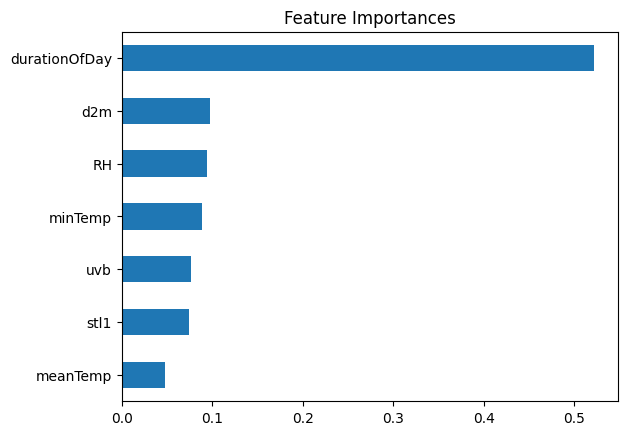

In [46]:
model_ranks = pd.Series(model.feature_importances_, index=X_train.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind='barh')
plt.title("Feature Importances")
plt.show()

In [47]:
test_score = clf2.score(X_test, y_test)
print('Test Set R-squared:', test_score)

Test Set R-squared: 0.5656694107723457


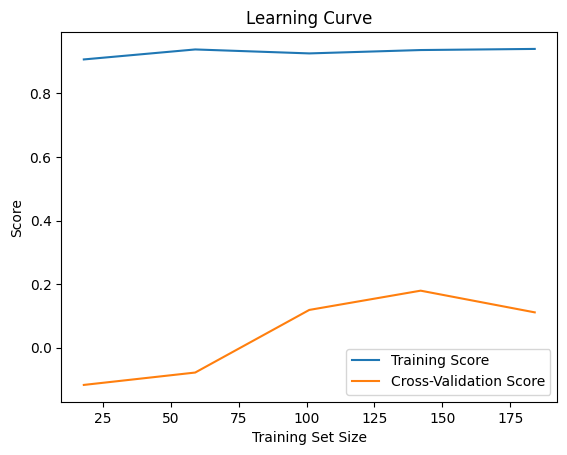

In [48]:
# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()